# Response Themes for "What aspects of Jupyter Notebook make it pleasant to use in your workflow?"

* Goal: Extract theme keywords from `pleasant_aspects` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [14]:
rs = np.random.RandomState(123)

In [303]:
pd.set_option('max_colwidth', 1000)

In [16]:
df = pd.read_csv('survey_short_columns.csv')

In [17]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [18]:
responses = pd.concat([df.pleasant_aspects_1, df.pleasant_aspects_2, df.pleasant_aspects_3], ignore_index=True)

In [19]:
assert len(responses) == len(df) * 3

In [20]:
responses.isnull().value_counts()

True     3953
False    1165
dtype: int64

In [21]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 5 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [33]:
show(responses.sample(20, random_state=rs))

0) Aesthetics

1) markdown syntax

2) Rendering reports then and there

3) Inline math

4) create lab for student

5) Interactive

6) Simple to use remotely

7) "nice" display optins (inline graphics, HTML for dataframes)

8) Support on GitHub

9) Save the execution trail

10) easy visualization

11) literacy programming

12) Out-Of-Order Execution

13) Frontend / Backend dissociation - I quite often experiment on a local machine and launch more calcul intensive jobs on AWS

14) step by step approach to solve any problem

15) Interactive evaluation

16) on-line

17) Rpy2

18) Programming in "cells" is intuitive and elegant.

19) Great for teaching



In [449]:
themes = {
    'ux': ['ux', 'ease of use', 'easy to use', 'easiness', 'shortcuts', 'clean', 'interface', 'design', 
           'pretty', 'navigation', 'web', 'appealing', 'intuitive', 'elegant', 'aesthetics', 'aesthetically',
           'completion', 'simple', 'simplicity', 'browser', 'appearance', 'hotkeys', 'ui', 'keyboard', 
           'style', 'editor', 'beautiful', 'help', 'responsive', 'pleasure to use', 'looks nice', 'looks great',
           'easy', 'hotkey', 'modal',],
    'ecosystem': ['community', 'open source', 'library', 'libraries', 'ecosystem', 'tool', 'tooling',
                  'standard', 'common', 'pandas', 'matplotlib', 'github', 'rpy2', 'ggplot', 'magic', 'magics',
                  'nbgrader', 'sqlalchemy', 'bokeh'],
    'cost': ['cost', 'free', 'cheaper', 'license', ],
    'integrated_content': ['media', 'inline', 'in-line', 'rich content', 'links', 'latex', 'mathjax',
                'markdown', 'markup', 'combine', 'code and', 'and code', 'code with', 'text and', 'and text', 
                'embedded', 'images',
                'HTML', 'all in one', 'all-in-one', 'comments', 'figures', 'integrate', 'integrated', 
                'contained', 'notes', 'documentation', 'literate programming', 'literacy programming',],
    'visualization': ['graphs', 'graphic', 'graphing', 'eye candy', 'plot', 'plotting', 'visualization', 'vizualization',
                      'visual', 'pictures', 'widgets', 'ipywidgets', 'see data', 'see charts', 'see plots',
                      'display data'],
    'collaboration': ['share', 'sharing', 'export', 'nbconvert', 'pdf', 'reproducibility', 'convert', 'others', 
                      'teaching', 'collaboration', 'collaborate', 'collaborative', 'slides', 'render', 
                      'nbviewer', 'presentation', 'repeatable', 'collaborators', 'team', 'tell a story'],
    'integration': ['integration',],
    'organization': ['folder structure', 'organization', 'organize'],
    'hosting': ['setup', 'install', 'server', 'portability', 'hosting', 'cloud', 'platform', 'remote',
                'docker', 'aws', 'online', 'on-line', 'deployment', 'centralized'],
    'interactivity': ['repl', 'cell', 'cells', 'cell execution', 'interactive', 'interactivity', 'immediate', 
                      'run', 'iterative', 'flexible', 'flexibility', 'live', 'experiment', 
                      'feedback', 'workflow', 'iteration', 'iterate', 'prototype', 'explore', 
                      'exploratory', 'sandbox', 'interaction', 'dynamic'],
    'language': ['python', 'language', 'ipython', 'bash',],
    'persistence': ['persistence', 'persistent', 'persist', 'save', 'saving', 'autosave', 'snapshot', 
                    'history', 'state', 'permanent record', 'log'],
    'speed': ['speed', 'quick', 'rapid', 'fast', 'instant'],
    'stability': ['robust', 'stable', 'reliable', 'reliability', 'mature', 'full featured'],
    'extensible': ['extensible', 'extensions', 'plugin', 'custom', 'extend', 'backends', 'modular', 'expanding',
                   'kernels', 'kernel support']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [450]:
import re

In [451]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [452]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [453]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

hosting 70
stability 6
ecosystem 80
interactivity 203
ux 316
visualization 163
language 58
persistence 33
organization 4
collaboration 109
integrated_content 252
speed 49
cost 5
integration 44
extensible 22


1    713
2    288
0    124
3     36
4      3
5      1
Name: themes, dtype: int64

In [460]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
1583,incrementallity,
5016,repeated tasks can be translated to scripts.,
229,Agility,
1960,working creates document,
4454,Vi keybindings,
5106,Excellent addition of features in a timely fashion,
4299,quite powerful,
29,Everything works (almost) always as expected,
898,Convenience,
3899,iFrames,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [247]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

hosting 70
stability 6
ux 314
interactivity 245
visualization 158
language 57
collaboration 110
integrated_content 243
speed 49
features 20
persistence 33
integration 55
community 65
extensible 15


1    684
2    301
0    131
3     43
4      5
5      1
Name: themes, dtype: int64

In [219]:
from IPython.display import display, clear_output

In [220]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(5))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,0,themes
2076,Self contained aspect of notebooks (single artefact),"content,"
437,"Easily integrates documentation, code, and media in one location.","content,"
3040,possibility to write latex,"content,"
4726,Ability to include annotations/markdown,"content,"
1657,Rich content and interactivity,"interactivity,content,"


Showing `content`. Type Enter to continue, "q" to stop.q


I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

In [467]:
tagged[tagged.themes.str.count(',') == 2].sample(20, random_state=rs)

,0,themes
1383,Easy to share documents with others,"ux,collaboration,"
594,Easy sharing with others,"ux,collaboration,"
2448,Great interface and inline documentation,"ux,integrated_content,"
1984,python + web (VERY powerful),"ux,language,"
1860,Possibility to make a presentation from a running code.,"interactivity,collaboration,"
2918,Easy install,"hosting,ux,"
5057,inline graphics,"visualization,integrated_content,"
28,quick iteration of ideas,"interactivity,speed,"
3049,Rich visual tools,"ecosystem,visualization,"
1916,Displays beautifully in GitHub Repos,"ecosystem,ux,"


## Keyword Frequencies

In [462]:
import matplotlib
import seaborn

In [463]:
counts = {}

In [464]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [465]:
hist = pd.Series(counts).sort_values()

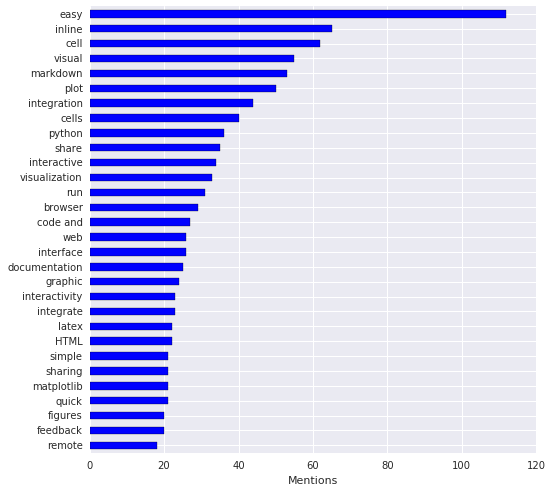

In [466]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')